# Readme
Ce notebook est pour analyse de les facteurs qui influent sur le taux de présence des patients aux rendez-vous médicaux en prenant des données de centrale mécicale de Rapée (Toute l'année de 2023). Dans ce premier partie, nous allons nous concentrer que sur la partie consulation de la médecine générale.

On va commencer par import les bibliothèques nécessaires et charger les données.

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
#import googlemaps
from datetime import datetime

sns.set_theme("notebook")

In [118]:
#df2 = pd.read_excel('dataset_gold.xlsx')
df2 = pd.read_excel('../donnees_nettroye/2023_gold.xlsx')

### FIlter les données pour la médecine générale
On va filtrer les données pour la médecine générale pour faciliter l'analyse.

In [119]:
df2.dropna(inplace=True)
df2 = df2[df2['Motif du RDV'].isin(['Adulte - Consultation de médecine générale','enfant/ado - consultation de médecine générale', 'Consultation de médecine du sport',"Certificat d'aptitude au sport"])]
df2 = df2[df2['Age'] < 100]
print(df2.head())

           Id Date de début  Début  Durée du RDV  \
0  4276042583       workday  matin            15   
4  4277334926       workday  matin            15   
5  4279375156       workday  matin            15   
8  4277315716       workday  matin            15   
9  4275045134       workday  matin            15   

                                 Motif du RDV RDV Internet Nouveau patient  \
0  Adulte - Consultation de médecine générale          Oui             Non   
4  Adulte - Consultation de médecine générale          Oui             Non   
5  Adulte - Consultation de médecine générale          Oui             Oui   
8  Adulte - Consultation de médecine générale          Oui             Oui   
9  Adulte - Consultation de médecine générale          Oui             Non   

          Statut Civilité                               Adresse complète  Age  
0  Absent excusé      Mme                    13 rue de KONNA, 35740 PACE   26  
4  Absent excusé       M.             74 Rue de la Colonie

Voir les global statistiques des données.

In [120]:
df2.describe(include='all')


,Id,Date de début,Début,Durée du RDV,Motif du RDV,RDV Internet,Nouveau patient,Statut,Civilité,Adresse complète,Age
count,9.530000e+03,9530,9530,9530.0,9530,9530,9530,9530,9530,9530,9530.000000
unique,NaN,2,3,NaN,4,2,2,3,2,6907,NaN
top,NaN,workday,soir,NaN,Adulte - Consultation de médecine générale,Oui,Oui,Présent,Mme,"8 R AUGUSTIN THIERRY PARIS 19, 75019 PARIS CEDEX",NaN
freq,NaN,8838,4183,NaN,7833,9422,5401,8326,5031,35,NaN
mean,4.771275e+09,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,32.171668
std,2.957118e+08,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,11.523023
min,4.261858e+09,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,4.524310e+09,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,25.000000
50%,4.758078e+09,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,30.000000
75%,5.012512e+09,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,37.000000


### Statistiques descriptives et Khi-2 test d'indépendance

On va faire des statistiques descriptives pour les variables catégorielles et numériques. Ensuite, on va faire le test d'indépendance de khi-2 pour voir si il y a une relation entre la variable cible (Statut) et les autres variables.  

`Khi-2 test d'indépendance`  
khi2_test est d'une méthode de la classe stats de scipy pour tester l'indépendance entre deux variables catégorielles. La méthode prend en entrée deux variables catégorielles et retourne une liste contenant la statistique de test et la p-valeur avec  ***H0: Les deux variables testés sont indépendant contre H1: Les deux variable testés sont dépendants***.  

Il prend deux variables catégorielles et retourne la statistique de test et la p-value. La p-value est la probabilité d'observer les données si l'hypothèse nulle  est vraie. Si la p-value est inférieure à 0,1, on rejette l'hypothèse nulle et on conclut qu'il y a une relation entre les deux variables.

### Distribution de la variable cible
On commence par voir la distribution de la statut (Agregé à trois catégories: Présent, Absent excusé et Absent non excusé). On voit que la plupart des patients sont présents à leur rendez-vous. 

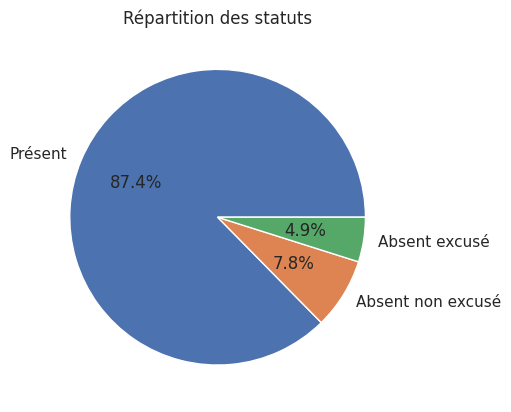

In [121]:
counts = df2['Statut'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Répartition des statuts')
plt.show()

### Influence par cilivité

Distribution de la variable cible par civilité. On voit que les femmes sont un plus présentes que les hommes.

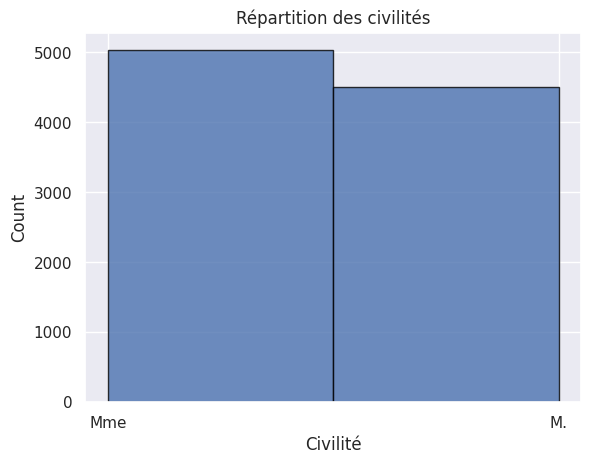

In [122]:
plt.hist(df2['Civilité'], bins=2, edgecolor='black', alpha=0.8)
# Ajouter des labels et un titre
plt.xlabel('Civilité')
plt.ylabel('Count')
plt.title('Répartition des civilités')
plt.show()

In [123]:
def custom_properties(key):
    # Vous pouvez personnaliser cette logique selon vos besoins
    if key[0] == 'M.': 
        color = 'lightblue'
    else :
        color = 'pink'
    return {'color': color}

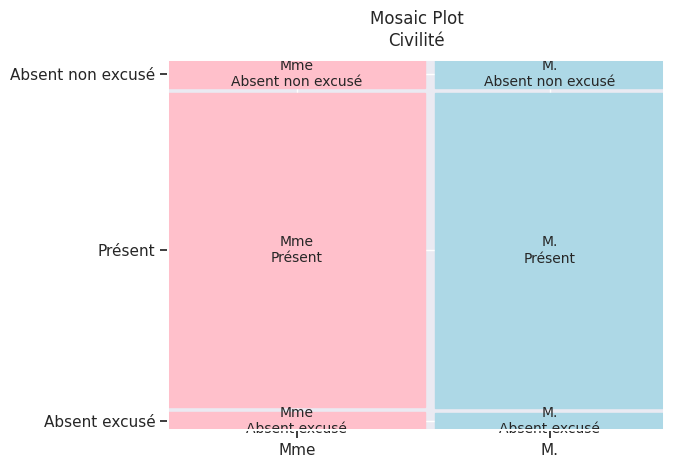

In [124]:
from statsmodels.graphics.mosaicplot import mosaic
# Create a mosaic plot
mosaic(df2, ["Civilité", 'Statut'], title='Mosaic Plot', gap=0.02, properties=custom_properties)
# Personnaliser les axes
plt.xlabel('Civilité')
plt.ylabel('Statut')
plt.show()

### Influence par Age

La distribution de l'âge des patients est asymétrique positive. On voit que la plupart des patients ont entre 20 et 40 ans. La distribution est sous une forme de loi normale (pas exactement mais apoche).

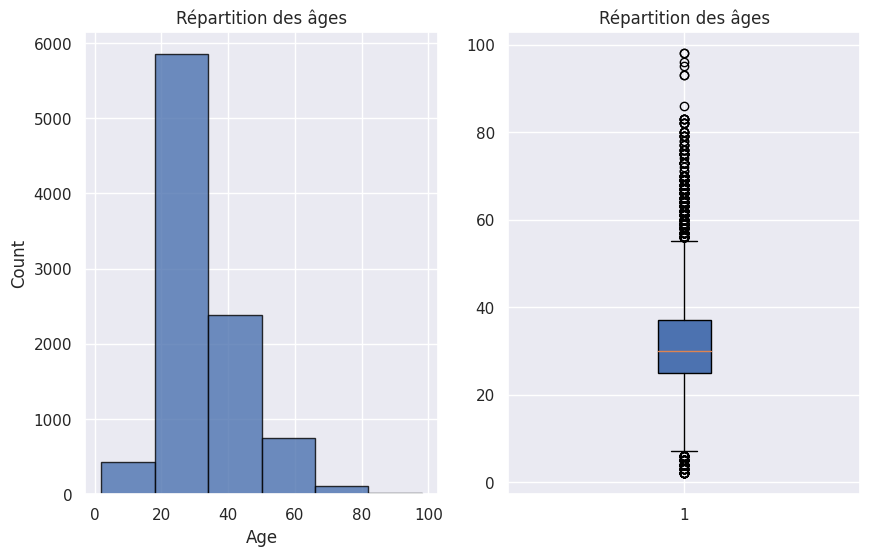

In [125]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df2['Age'], bins=6, edgecolor='black', alpha=0.8)
# Ajouter des labels et un titre
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Répartition des âges')
# Afficher l'histogramme

plt.subplot(1, 2, 2)
plt.boxplot(df2['Age'],patch_artist=True)
plt.title('Répartition des âges')    

plt.show()

On va voir la distribution de l'âge des patients et voir si il y a une relation entre l'âge et la variable cible. On fait une boxplot pour voir la distribution de l'âge par statut.

/tmp/ipykernel_57694/697526988.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Statut", y="Age", data=df2, palette="husl")
/home/wang/miniforge3/envs/optim/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/wang/miniforge3/envs/optim/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/wang/miniforge3/envs/optim/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-

Text(0.5, 1.0, 'Répartition des âges par statut')

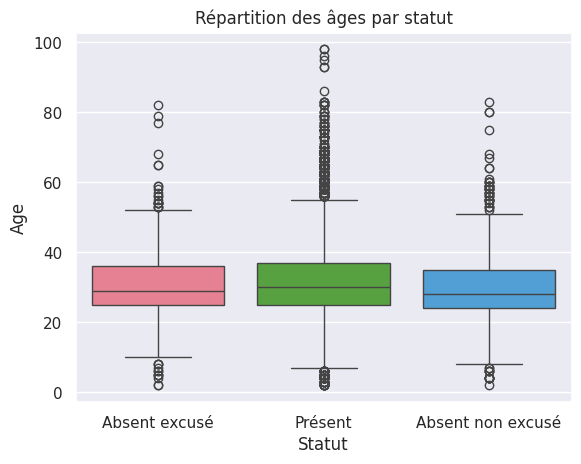

In [126]:
import seaborn as sns

sns.set_theme("notebook")
sns.boxplot(x="Statut", y="Age", data=df2, palette="husl")
plt.title('Répartition des âges par statut')

Et faire la test d'indépendance de khi-2 pour quantifiler si il y a une relation entre l'âge et la variable cible. La p-value = 0,02 < 0.05, on rejette l'hypothèse nulle et on conclut qu'il y a une relation entre l'âge et la variable cible.

In [93]:
from scipy.stats import chi2_contingency

# Assuming 'var1' and 'var2' are the names of your variables
bins = [0, 10, 20, 40, 60, 70, 100]
# Use pd.cut function can attribute the values into its specific bins
Age = pd.cut(df2['Age'], bins)
contingency_table = pd.crosstab(Age, df2['Statut'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("chi2 statistic", chi2)
print("p-value", p)
print("degrees of freedom", dof)

chi2 statistic 20.964726545435347
p-value 0.02134087693235297
degrees of freedom 10


### Influence par si Rdv est en ligne
(On fait la même chose pour les autres variables, pour gagner du temps, je saute les explications)

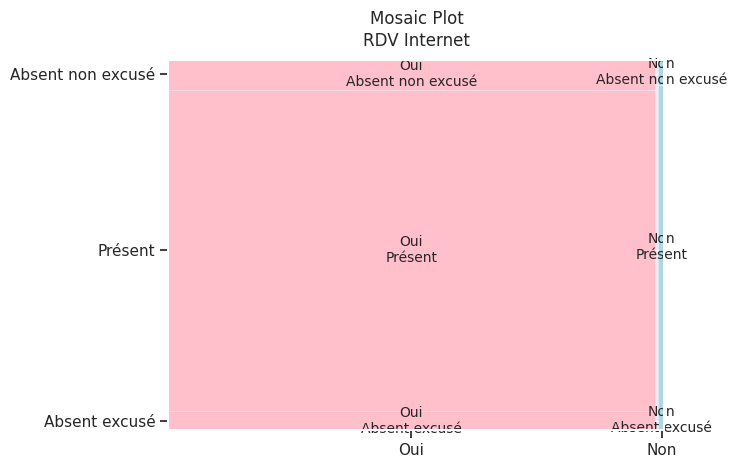

In [98]:
def custom_properties(key):
    # Vous pouvez personnaliser cette logique selon vos besoins
    if key[0] == 'Non': 
        color = 'lightblue'
    else :
        color = 'pink'
    return {'color': color}

mosaic(df2, ["RDV Internet", 'Statut'], title='Mosaic Plot', gap=0.01, properties=custom_properties)
# Personnaliser les axes
plt.xlabel('RDV Internet')
plt.ylabel('Statut')
plt.show()

In [99]:
from scipy.stats import chi2_contingency

# Assuming 'var1' and 'var2' are the names of your variables
RDV_Internet = df2['RDV Internet']
contingency_table = pd.crosstab(RDV_Internet, df2['Statut'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("chi2 statistic", chi2)
print("p-value", p)
print("degrees of freedom", dof)

chi2 statistic 0.3351066632176094
p-value 0.8457315118639378
degrees of freedom 2


### Influence par si le nouveau patient 

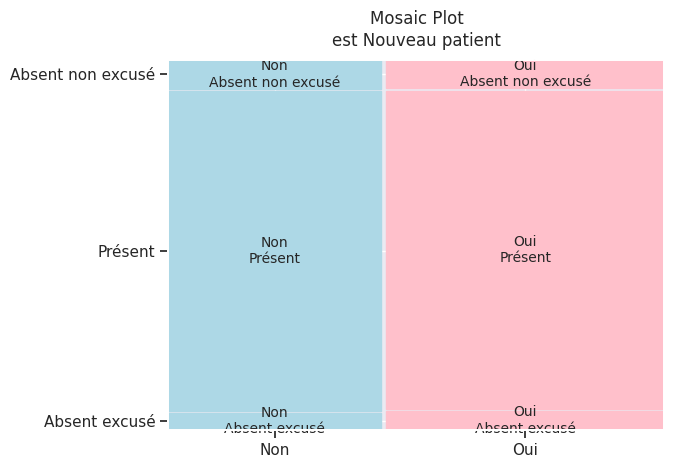

In [101]:
def custom_properties(key):
    # Vous pouvez personnaliser cette logique selon vos besoins
    if key[0] == 'Non': 
        color = 'lightblue'
    else :
        color = 'pink'
    return {'color': color}

mosaic(df2, ["Nouveau patient", 'Statut'], title='Mosaic Plot', gap=0.01, properties=custom_properties)
# Personnaliser les axes
plt.xlabel('est Nouveau patient')
plt.ylabel('Statut')
plt.show()

In [102]:
from scipy.stats import chi2_contingency

Nouveau_patient = df2['Nouveau patient']
contingency_table = pd.crosstab(Nouveau_patient, df2['Statut'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("chi2 statistic", chi2)
print("p-value", p)
print("degrees of freedom", dof)

chi2 statistic 1.0088476430429647
p-value 0.6038534025468947
degrees of freedom 2


### Influence par le temps de RDV (matin, après-midi, soir)

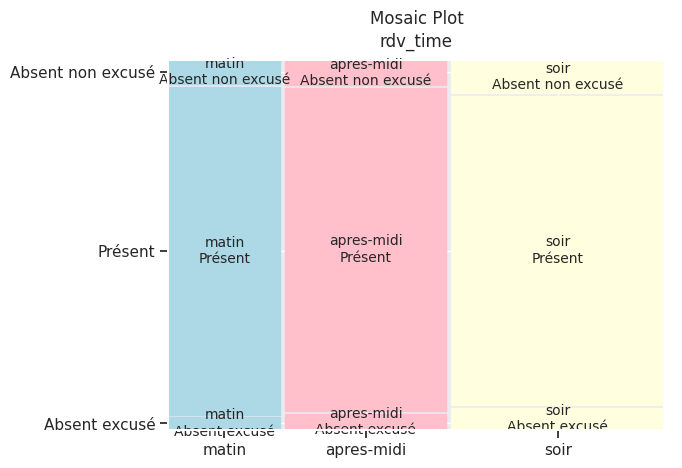

In [105]:
def custom_properties(key):
    # Vous pouvez personnaliser cette logique selon vos besoins
    if key[0] == 'matin': 
        color = 'lightblue'
    elif key[0] == 'apres-midi':
        color = 'pink'
    else:
        color = 'lightyellow'
    return {'color': color}

mosaic(df2, ["Début", 'Statut'], title='Mosaic Plot', gap=0.01, properties=custom_properties)

# Personnaliser les axes
plt.xlabel('rdv_time')
plt.ylabel('Statut')
plt.show()

In [106]:
from scipy.stats import chi2_contingency

RDV_time = df2['Début']
contingency_table = pd.crosstab(RDV_time, df2['Statut'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("chi2 statistic", chi2)
print("p-value", p)
print("degrees of freedom", dof)

chi2 statistic 41.77756319899566
p-value 1.8549790353520185e-08
degrees of freedom 4


### Influence par le jour de la semaine

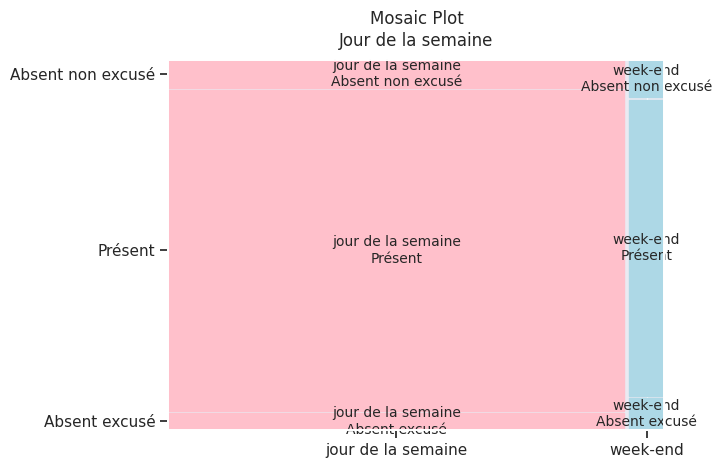

In [116]:
def custom_properties(key):
    # Vous pouvez personnaliser cette logique selon vos besoins
    if key[0] == 'week-end': 
        color = 'lightblue'
    else:
        color = 'pink'
    return {'color': color}

map_francais = {'workday': 'jour de la semaine', 'weekend': 'week-end'}
#df2['Date de début'] = df2['Date de début'].map(map_francais)
mosaic(df2, ["Date de début", 'Statut'], title='Mosaic Plot', gap=0.01, properties=custom_properties)
# Personnaliser les axes
plt.xlabel('Jour de la semaine')
plt.ylabel('Statut')
plt.show()

In [115]:
from scipy.stats import chi2_contingency

Day = df2['Date de début']
contingency_table = pd.crosstab(Day, df2['Statut'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("chi2 statistic", chi2)
print("p-value", p)
print("degrees of freedom", dof)

chi2 statistic 30.577895835040543
p-value 2.2913650540349396e-07
degrees of freedom 2
